In [ ]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "lxml>=3.7" "nltk>=3.2" "beautifulsoup4>=4.6" "pypdf2>=1.26" "networkx>=2.8" "scipy<2,>=0.18" "scikit-learn>=0.19" "xlrd<2,>=1.0" "mpl-axes-aligner<2,>=1.1"

In [1]:
import matplotlib.pyplot as plt

(chp-working-with-data)=
# Processing Tabular Data

<!-- what, why -->

## Introduction
Data analysis in literary studies tends to involve the analysis of text documents (see chapters {numref}`chp-vector-space-model` and {numref}`chp-getting-data`). This is not the norm. Data-intensive research in the humanities and allied social sciences in general is far more likely to feature the analysis of <span class="index">tabular data</span> than text documents. Tabular datasets organize machine-readable data (numbers and strings) into a sequence of records. Each record is associated with a fixed number of fields. Tabular datasets are often viewed in a spreadsheet program such as LibreOffice Calc or Microsoft Excel. This chapter demonstrates the standard methods for analyzing tabular data in Python in the context of a case study in <span class="index">onomastics</span>, a field devoted to the study of naming practices.

In this chapter, we review an external library, "<span class="index">Pandas</span>" {cite:p}`mckinney:2010`, which was
briefly touched upon in chapter {ref}`chp-introduction-cook-books`. This chapter provides a
detailed account of how scholars can use the library to load, manipulate, and analyze tabular data. Tabular data are ubiquitous and
often complement text datasets like those analyzed in previous chapters. (Metadata
accompanying text documents is often stored in a tabular format.)  As example data here,
we focus on a historical dataset consisting of records in the naming of children from the
United States of America. These data are chosen for their connection to existing
historical and sociological research on naming practices---{cite:t}`fischer1989albion`, {cite:t}`sue:2007`,
and {cite:t}`lieberson:2000` are three among countless examples---and because they create a useful context for practicing routines such as column selection or drawing time series. The material presented here should be especially useful for scholars coming from a different scripting language background (e.g., R or Matlab), where similar manipulation routines exist. We will cover in detail a number of high-level functions from the Pandas package, such as the convenient `groupby()` method and methods for splitting and merging datasets. The essentials of data visualization are also introduced, on which subsequent chapters in the book will draw. The reader will, for instance, learn to make histograms and line plots using the Pandas `DataFrame` methods `plot()` or `hist()`.

As this chapter's case study, we will examine diachronic developments in child naming
practices. In his book *A Matter of Taste*, {cite:t}`lieberson:2000` examines long-term
shifts in child naming practices from a cross-cultural and socio-historical perspective.
One of the key observations he makes concerns an accelerating rate of change in the names
given to children over the past two centuries. While nineteenth century data suggest
rather conservative naming practices, with barely any changes in the most popular names
over long periods of time, more recent data exhibit similarities with <span
class="index">fashion trends</span> (see, e.g., {cite:t}`acerbi:2012`), in which the rate
of change in leading names has significantly increased. As explained in depth by
{cite:t}`lieberson:2000,lieberson:2003`, it is extremely difficult to pinpoint the factors
underlying this shift in naming practices, because of its co-occurrence with numerous
sociological, demographic, and cultural changes (e.g., industrialization, spread of
literacy, and decline of the nuclear family). We do not seek to find a conclusive
explanation for the observed shifts in the current chapter. The much more modest goal of
the chapter is, one the one hand, to show how to map out such examples of cultural change
using Python and Pandas, and, on the other hand, to replicate some of the analyses in the
literature that aim to provide explanations for the shift in naming practices.

The structure of the chapter is as follows. First, in section
{ref}`sec-working-with-data-tabular-data` we introduce the most important third-party
library for manipulating and analyzing <span class="index">tabular data</span>: Pandas.
Subsequently, in section {ref}`sec-working-with-data-mapping-change` we show how this
library can be employed to map out the long-term shift in naming practices as addressed by
{cite:t}`lieberson:2000`. After that, we work on a few small case studies in section
{ref}`sec-working-with-data-case-studies`. These case studies serve, one the one hand, to
further investigate some of the changes of naming practice in the United States, and, on
the other hand, to demonstrate advanced data manipulation techniques. Finally, we conclude
in section {ref}`sec-working-with-data-further-reading` with an overview of some resources
for further reading on the subject of analyzing tabular data with Python.

(sec-working-with-data-tabular-data)=
## Loading, Inspecting, and Summarizing Tabular Data

In this section, we will demonstrate how to load, clean and inspect tabular data with
Python. As an example dataset, we will work with the baby name data as provided by the
[United States Social Security
Administration](https://www.ssa.gov/OACT/babynames/limits.html). A dump of this data can
be found in the file `data/names.csv`, which contains records in the naming of children in
the United Sates from the nineteenth century until modern times. For each year, this dataset
provides all names for girls and boys that occur at least five times. Before we can
analyze the dataset, the first task is to load it into Python. To appreciate the loading
functionalities as implemented by the library Pandas, we will first write our own data
loading routines in pure Python. The <span class="index">`csv`</span> module is part of
Python's standard library and can employed to conveniently read comma-separated values
files (cf. chapter {ref}`chp:getting-data`). The following code block implements a short
routine, resulting in a variable `data` which is a list of baby name records. Each record
is represented by a dictionary with the following keys: "name", "frequency" (an absolute
number), "sex" ("boy" or "girl"), and "year".

In [2]:
import csv

with open('data/names.csv') as infile:
    data = list(csv.DictReader(infile))

Recall from chapter {ref}`chp-getting-data` that <span class="index">`csv.DictReader`</span> assumes that the supplied
CSV file contains a header row with column names. For each row, then, these column names
are used as keys in a dictionary with the contents of their corresponding cells as
values. `csv.DictReader` returns a generator object, which requires invoking `list` in the
assignment above to give us a list of dictionaries. The following prints the first dictionary:

In [3]:
print(data[0])

{'year': '1880', 'name': 'Mary', 'sex': 'F', 'frequency': '7065'}


Inspecting the (ordered) dictionaries in `data`, we immediately encounter a problem with
the data types of the values. In the example above the value corresponding to "frequency"
has type `str`, whereas it would make more sense to represent it as an integer. Similarly,
the year 1880 is also represented as a string, yet an integer representation would allow
us to more conveniently and efficiently select, manipulate, and sort the data. This
problem can be overcome by recreating the `data` list with dictionaries in which the
values corresponding to "frequency" and "year" have been changed to `int` type:

In [4]:
data = []

with open('data/names.csv') as infile:
    for row in csv.DictReader(infile):
        row['frequency'] = int(row['frequency'])
        row['year'] = int(row['year'])
        data.append(row)

print(data[0])

{'year': 1880, 'name': 'Mary', 'sex': 'F', 'frequency': 7065}


With our values changed to more appropriate data types, let us first inspect some general properties of the dataset. First of all, what timespan does the dataset cover? The year of the oldest naming records can be retrieved with the following expression:

In [5]:
starting_year = min(row['year'] for row in data)
print(starting_year)

1880


The first expression iterates over all rows in `data`, and extracts for each row the value
corresponding to its year. Calling the built-in function <span class="index">`min()`</span> allows us to retrieve the
minimum value, i.e., the earliest year in the collection. Similarly, to fetch the most recent year of data, we employ the function <span class="index">`max()`</span>:

In [6]:
ending_year = max(row['year'] for row in data)
print(ending_year)

2015


By adding one to the difference between the starting year and ending year, we get the number of years covered in the dataset:

In [7]:
print(ending_year - starting_year + 1)

136


Next, let us verify that the dataset provides at least ten boy and girl names for each
year. The following block of code is intended to illustrate how cumbersome analysis can be without using a purpose-built library for analyzing tabular data.

In [8]:
import collections

# Step 1: create counter objects to store counts of girl and boy names
# See Chapter 2 for an introduction of Counter objects
name_counts_girls = collections.Counter()
name_counts_boys = collections.Counter()

# Step 2: iterate over the data and increment the counters
for row in data:
    if row['sex'] == 'F':
        name_counts_girls[row['year']] += 1
    else:
        name_counts_boys[row['year']] += 1

# Step 3: Loop over all years and assert the presence of at least
# 10 girl and boy names
for year in range(starting_year, ending_year + 1):
    assert name_counts_girls[year] >= 10
    assert name_counts_boys[year] >= 10

In this code block, we first create two <span class="index">`Counter`</span> objects, one for girls and one for boys
(step 1). These counters are meant to store the number of girl and boy names in each
year. In step 2, we loop over all rows in `data` and check for each row whether the
associated sex is female (`F`) or male (`M`). If the sex is female, we update the girl
name counter; otherwise we update the boy name counter. Finally, in step 3, we check for
each year whether we have observed at least ten boy names and ten girl names. Although this
particular routine is still *relatively* simple and straightforward, it is easy to see that
the complexity of such routines increases rapidly as we try to implement slightly more
difficult problems. Furthermore, such routines tend to be relatively hard to maintain,
because, on the one hand, from reading the code it is not immediately clear what it ought
to accomplish, and, on the other hand, errors easily creep in because of the relatively
verbose nature of the code.

How can we make life easier? By using the Python Data Analysis Library "Pandas", which is a high-level, third-party package designed to
make working with tabular data easier and more intuitive. The package has excellent support for
analyzing tabular data in various formats, such as SQL tables, Excel spreadsheets, and CSV
files. With only two primary data types at its core (i.e., <span
class="index">`Series`</span> for one-dimensional data, and <span
class="index">`DataFrame`</span> for two-dimensional data), the library provides a highly
flexible, efficient, and accessible framework for doing data analysis in finance,
statistics, social science, and---as we attempt to show in the current chapter---the
humanities. While a fully comprehensive account of the library is beyond the scope of this
chapter, we are confident that this chapter's exposition of Pandas's most important
functionalities should give sufficient background to work through the rest of this book to
both novice readers and readers coming from other programming languages. 

(sec-working-with-data-tabular-data-with-pandas)=
### Reading tabular data with Pandas

Let us first import the Pandas library, using the conventional <span class="index">alias</span> `pd`:

In [9]:
import pandas as pd

Pandas provides reading functions for a rich variety of data formats, such as Excel, SQL, HTML, JSON, and even tabular data saved at the clipboard. To load the contents of a CSV file, we use the <span class="index">`pandas.read_csv()`</span> function. In the following code block, we use this function to read and load the baby name data:

In [10]:
df = pd.read_csv('data/names.csv')

The return value of `read_csv()` is a `DataFrame` object, which is the primary data type for two-dimensional data in Pandas. To inspect the first *n* rows of this data frame, we can use the method <span class="index">`DataFrame.head()`</span>:

In [11]:
df.head(n=5)

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In our previous attempt to load the baby name dataset with pure Python, we had to cast the
"year" and "frequency" column values to have type `int`. With Pandas, there is no need for
this, as Pandas' reading functions are designed to automatically infer the data types of
columns, and thus allow heterogeneously typed columns. The <span class="index">`dtypes`</span> attribute of a `DataFrame` object provides an overview of the data type used for each column:

In [12]:
print(df.dtypes)

year          int64
name         object
sex          object
frequency     int64
dtype: object


This shows that `read_csv()` has accurately inferred the data types of the different
columns. Because Pandas stores data using <span class="index">NumPy</span> (see chapter {ref}`chp-vector-space-model`), the data types shown above are data types inherited from NumPy. Strings are stored as opaque Python objects (hence ``object``) and integers are stored as 64-bit integers (``int64``). Note that when working with integers, although Python permits us to use arbitrarily large numbers, NumPy and Pandas typically work with 64-bit integers (that is, integers between $-2^{63}$ and $2^{63} - 1$).

(sec-working-with-data-data-selection)=
#### Data selection

Columns may be accessed by name using syntax which should be familiar from using Python dictionaries:

In [13]:
df['name'].head()

0         Mary
1         Anna
2         Emma
3    Elizabeth
4       Minnie
Name: name, dtype: object

Note that the <span class="index">``DataFrame.head()``</span> method can be called on individual columns as well as on entire
data frames. The method is one of several methods which work on columns as well as on data
frames (just as ``copy()`` is a method of ``list`` and ``dict`` classes). Accessing a column
this way yields a <span class="index">`Series`</span> object, which is the primary one-dimensional data type in
Pandas. `Series` objects are high-level data structures built on top of the NumPy's
<span class="index">`ndarray`</span> object (see chapter {ref}`chp-vector-space-model`). The data underlying a `Series` object can be retrieved through the `Series.values` attribute:

In [14]:
print(type(df['sex'].values))

<class 'numpy.ndarray'>


The data type underlying `Series` objects is NumPy's one-dimensional <span class="index">`ndarray`</span> object. Similarly, `DataFrame` objects are built on top of two-dimensional `ndarray` objects. `ndarray` objects can be considered to be the low-level counterpart of Pandas's `Series` and `DataFrame` objects. While NumPy and its data structures are already sufficient for many use cases in scientific computing, Pandas adds a rich variety of functionality specifically designed for the purpose of data analysis.

Let us continue with exploring ways in which data frames can be accessed. Multiple columns are selected by supplying a list of column names:

In [15]:
df[['name', 'sex']].head()

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F


To select specific rows of a `DataFrame` object, we employ the same slicing syntax used to retrieve multiple items from lists, strings, or other ordered sequence types. We provide the slice to the <span class="index">`DataFrame.iloc`</span> ("integer location") attribute.

In [16]:
df.iloc[3:7]

,year,name,sex,frequency
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
5,1880,Margaret,F,1578
6,1880,Ida,F,1472


Single rows can be retrieved using integer location as well:

In [17]:
df.iloc[30]

year              1880
name         Catherine
sex                  F
frequency          688
Name: 30, dtype: object

Each `DataFrame` has an `index` and a `columns` attribute, representing the row indexes and column names respectively. The objects associated with these attributes are both called "indexes" and are instances of <span class="index">``Index``</span> (or one of its subclasses). Like a Python ``tuple``, ``Index`` is designed to represent an immutable sequence. The class is, however, much more capable than an ordinary ``tuple``, as instances of ``Index`` support many operations supported by NumPy arrays.

In [18]:
print(df.columns)

Index(['year', 'name', 'sex', 'frequency'], dtype='object')


In [19]:
print(df.index)

RangeIndex(start=0, stop=1858436, step=1)


At loading time, we did not specify which column of our dataset should be used as "index", i.e., an object that can be used to identify and select specific rows in the table. Therefore, `read_csv()` assumes that an index is lacking and defaults to a <span class="index">`RangeIndex`</span> object. A `RangeIndex` is comparable to the immutable number sequence yielded by `range`, and basically consists of an ordered sequence of numbers.

Sometimes a dataset stored in a CSV file has a column which contains a natural index,
values by which we would want to refer to rows. That is, sometimes a dataset has
meaningful "row names" with which we would like to access rows, just as we access columns
by column names. When this is the case, we can identify this index when loading the
dataset, or, alternatively, set the index after it has been loaded. The function `read_csv()` accepts an argument `index_col` which specifies which column should be used as index in the resulting `DataFrame`. For example, to use the "year" column as the `DataFrame`'s index, we write the following:

In [20]:
df = pd.read_csv('data/names.csv', index_col=0)
df.head()

,name,sex,frequency
year,,,
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746


To change the index of a `DataFrame` after it has been constructed, we can use the method
<span class="index">`DataFrame.set_index()`</span>. This method takes a single positional
argument, which represents the name of the column we want as index. For example, to set
the index to the year column, we write the following:

In [21]:
#  first reload the data without index specification
df = pd.read_csv('data/names.csv')
df = df.set_index('year')
df.head()

,name,sex,frequency
year,,,
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746


By default, this method yields a new version of the `DataFrame` with the new index (the old index is discarded). Setting the index of a `DataFrame` to one of its columns allows us to select rows by their index labels using the `loc` attribute of a data frame. For example, to select all rows from the year 1899, we could write the following:

In [22]:
df.loc[1899].head()

,name,sex,frequency
year,,,
1899,Mary,F,13172
1899,Anna,F,5115
1899,Helen,F,5048
1899,Margaret,F,4249
1899,Ruth,F,3912


We can specify further which value or values we are interested in. We can select a specific column from the row(s) associated with the year 1921 by passing an element from the row index and one of the column names to the <span class="index">``DataFrame.loc``</span> attribute. Consider the following example, in which we index for all rows from the year 1921, and subsequently, select the name column:

In [23]:
df.loc[1921, 'name'].head()

year
1921        Mary
1921     Dorothy
1921       Helen
1921    Margaret
1921        Ruth
Name: name, dtype: object

If we want to treat our entire data frame as a NumPy array we can also access elements of the data frame using the same syntax we would use to access elements from a NumPy array. If this is what we wish to accomplish, we pass the relevant row and column indexes to the <span class="index">``DataFrame.iloc``</span> attribute:

In [24]:
print(df.iloc[10, 2])

1258


In the code block above, the first index value `10` specifies the 11th row (containing ``('Annie', 'F', 1258)``), and the second index `2` specifies the third column (`frequency`).

Indexing NumPy arrays, and hence, `DataFrame` objects can become much fancier, as we try to show in the following examples. First, we can select multiple columns conditioned on a particular row index. For example, to select both the "name" and "sex" columns for rows from year 1921, we write:

In [25]:
df.loc[1921, ['name', 'sex']].head()

,name,sex
year,,
1921,Mary,F
1921,Dorothy,F
1921,Helen,F
1921,Margaret,F
1921,Ruth,F


Similarly, we can employ multiple row selection criteria, as follows:

In [26]:
df.loc[[1921, 1967], ['name', 'sex']].head()

,name,sex
year,,
1921,Mary,F
1921,Dorothy,F
1921,Helen,F
1921,Margaret,F
1921,Ruth,F


In this example, we select the name and sex columns for those rows of which the year
is either 1921 or 1967. To see that rows associated with the year 1967 are indeed selected, we can look at the final rows with the <span class="index">``DataFrame.tail()``</span> method:

In [27]:
df.loc[[1921, 1967], ['name', 'sex']].tail()

,name,sex
year,,
1967,Zbigniew,M
1967,Zebedee,M
1967,Zeno,M
1967,Zenon,M
1967,Zev,M


The same indexing mechanism can be used for positional indexes with <span class="index">`DataFrame.iloc`</span>, as shown in the following example:

In [28]:
df.iloc[[3, 10], [0, 2]]

,name,frequency
year,,
1880,Elizabeth,1939
1880,Annie,1258


Even fancier is to use integer slices to select a sequence of rows and columns. In the code block below, we select all rows from position 1000 to 1100, as well as the last two columns:

In [29]:
df.iloc[1000:1100, -2:].head()

,sex,frequency
year,,
1880,M,305
1880,M,301
1880,M,283
1880,M,274
1880,M,271


Remember that the data structure underlying a `DataFrame` object is a two-dimensional NumPy
`ndarray` object. The underlying `ndarray` can be accessed through the `values`
attribute. As such, the same indexing and slicing mechanisms can be employed directly on this more low-level data structure, i.e.:

In [30]:
array = df.values
array_slice = array[1000:1100, -2:]

In what preceded, we have covered the very basics of working with tabular data in Pandas. Naturally, there is a lot more to say about both Pandas's objects. In what follows, we will touch upon various other functionalities provided by Pandas (e.g., more advanced data selection strategies, and plotting techniques). To liven up this chapter's exposition of Pandas's functionalities, we will do so by exploring the long-term shift in naming practices as addressed in {cite:t}`lieberson:2000`.

(sec-working-with-data-mapping-change)=
## Mapping Cultural Change

(sec-working-with-data-turnover-in-naming-practices)=
### Turnover in naming practices

{cite:t}`lieberson:2000` explores cultural changes in naming practices in the past two centuries. As previously mentioned, he describes an acceleration in the rate of change in the leading names given to newborns. Quantitatively mapping cultural changes in naming practices can be realized by considering their "<span class="index">turnover series</span>" (cf. {cite:t}`acerbi:2014`). Turnover can be defined as the number of new names that enter a popularity-ranked list at position $n$ at a particular moment in time $t$. The computation of a turnover series involves the following steps: first, we can calculate an annual popularity index, which contains all unique names of a particular year ranked according to their frequency of use in descending order. Subsequently, the popularity indexes can be put in chronological order, allowing us to compare the indexes for each year to the previous year. For each position in the ranked lists, we count the number of "shifts" in the ranking that have taken place between two consecutive years. This "number of shifts" is called the turnover. Computing the turnover for all time steps in our collections yields a turnover series.

To illustrate these steps, consider the artificial example in the table below ({numref}`tbl-turnover-ranking`), which consists of five chronologically ordered ranked lists:

```{table} Artificial example of name popularity rankings at five points in time.
:name: tbl-turnover-ranking

| Ranking | $t_1$   | $t_2$   | $t_3$   | $t_4$   | $t_5$   |
| ------- | ------- | ------- | ------- | ------- | ------- |
| 1       | John    | John    | Henry   | Henry   | Henry   |
| 2       | Henry   | Henry   | John    | John    | John    |
| 3       | Lionel  | William | Lionel  | Lionel  | Lionel  |
| 4       | William | Gerard  | William | Gerard  | Gerard  |
| 5       | Gerard  | Lionel  | Gerard  | William | William |
```

For each two consecutive points in time, for example $t_1$ and $t_2$, the number of new names that have entered the ranked lists at a particular position $n$ is counted. Between $t_1$ and $t_2$, the number of new names at position 1 and 2 equals zero, while at position 3, there is a different name (i.e., William). When we compare $t_2$ and $t_3$, the turnover at the highest rank equals one, as Henry takes over the position of John. In what follows, we revisit these steps, and implement a function in Python, <span class="index">`turnover()`</span>, to compute <span class="index">turnover series</span> for arbitrary time series data.

The first step is to compute annual popularity indexes, consisting of the leading names in a particular year according to their frequency of use. Since we do not have direct access to the usage frequencies, we will construct these rankings on the basis of the names' "frequency" values. Each annual popularity index will be represented by a `Series` object with names, in which the order of the names represents the name ranking. The following code block implements a small function to create annual popularity indexes:

In [31]:
def df2ranking(df, rank_col='frequency', cutoff=20):
    """Transform a data frame into a popularity index."""
    df = df.sort_values(by=rank_col, ascending=False)
    df = df.reset_index()
    return df['name'][:cutoff]

In this function, we employ the method <span class="index">`DataFrame.sort_values()`</span> to sort the rows of a `DataFrame` object by their `frequency` values in descending order (i.e. `ascending=False`).^[Ties (rows with the same frequency) are not resolved in any particularly meaningful fashion. If the sorting of items with the same frequency is important, provide a list of columns rather than a single column as the ``by`` argument. Keeping track of ties would require a different approach.] Subsequently, we replace the `DataFrame`'s index with the (default) `RangeIndex` by resetting its index. Finally, we return the "name" column, and slice this `Series` object up to the supplied cutoff value, thus retrieving the $n$ most popular names.

The next step is to compute popularity indexes for each year in the collection, and put them in chronological order. This can be achieved in various ways. We will demonstrate two of them. The first solution is implemented in the following code block:

In [32]:
girl_ranks, boy_ranks = [], []
for year in df.index.unique():
    for sex in ('F', 'M'):
        if sex == 'F':
            year_df = df.loc[year]
            ranking = df2ranking(year_df.loc[year_df['sex'] == sex])
            ranking.name = year
            girl_ranks.append(ranking)
        else:
            year_df = df.loc[year]
            ranking = df2ranking(year_df.loc[year_df['sex'] == sex])
            ranking.name = year
            boy_ranks.append(ranking)

girl_ranks = pd.DataFrame(girl_ranks)
boy_ranks = pd.DataFrame(boy_ranks)

Let us go over this implementation line by line. First, we create two lists (`girl_ranks` and `boy_ranks`) that will hold the annual popularity indexes for girl and boy names. Second, we iterate over all years in the collection by calling `unique()` on the index, which yields a NumPy array with unique integers. We want to create separate popularity rankings for boys and girls, which is why we iterate over both sexes in the third step. Next, we construct a popularity index for a particular year and sex by (i) selecting all rows in `df` that are boys' names, (ii) sub-selecting the rows from a particular year, and (iii) appling the function `df2ranking()` to the data frame yielded by step i and ii. `Series` objects feature a `name` attribute, enabling developers to name series. Naming a `Series` object is especially useful when multiple `Series` are combined into a `DataFrame`, with the `Series` becoming columns. (We will demonstrate this shortly.) After naming the annual popularity index in step four, we append it to the gender-specific list of rankings. Finally, we construct two new `DataFrame` objects representing the annual popularity indexes for boy and girl names in the last two lines. In these `DataFrame`s, each row represents an annual popularity index, and each column represents the position of a name in this index. The row indexes of the yielded data frames are constructed on the basis of the `name` attribute we supplied to each individual `Series` object.

The above-described solution is pretty hard to understand, and also rather verbose. We
will now demonstrate the second solution, which is more easily read, much more concise, and
slightly faster. This approach makes use of the <span class="index">``DataFrame.groupby()``</span> method. Using ``groupby()`` typically involves two elements: a column by which we want to aggregate rows and a function which takes the rows as input and produces a single result. The following line of code illustrates how to calculate the median year for each name in the dataset (perhaps interpretable as an estimate of the midpoint of its period of regular use):

In [33]:
# we use reset_index() to make `year` available as a column
df.reset_index().groupby('name')['year'].median().head()

name
Aaban        2011.5
Aabha        2013.0
Aabid        2003.0
Aabriella    2014.0
Aada         2015.0
Name: year, dtype: float64

To see names that have long since passed out of fashion  (e.g., "Zilpah", "Alwina", "Pembroke"), we need only sort the series in ascending order:

In [34]:
df.reset_index().groupby('name')['year'].median().sort_values().head()

name
Roll      1881.0
Zilpah    1881.0
Crete     1881.5
Sip       1885.0
Ng        1885.0
Name: year, dtype: float64

Equipped with this new tool we simplify the earlier operation considerably, noting that if we want to group by a data frame's index (rather than one of its column) we do this by using the ``level=0`` keyword argument:

In [35]:
boy_ranks = df.loc[df.sex == 'M'].groupby(level=0).apply(df2ranking)
girl_ranks = df.loc[df.sex == 'F'].groupby(level=0).apply(df2ranking)

Constructing each of the data frames now only takes a single line of code! This implementation makes use of two crucial ingredients: <span class="index">`DataFrame.groupby()`</span> and <span class="index">`DataFrame.apply()`</span>. First, let us explain the `DataFrame.groupby()` method in greater detail. `groupby()` is used to split a data set into $n$ groups of rows on the basis of some criteria. Consider the following example dataset:

In [36]:
import numpy as np

data = pd.DataFrame({'name': ['Jennifer', 'Claire', 'Matthew', 'Richard',
                              'Richard', 'Claire', 'Matthew', 'Jennifer'],
                     'sex': ['F', 'F', 'M', 'M',
                             'M', 'F', 'M', 'F'],
                     'value': np.random.rand(8)})
data

,name,sex,value
0,Jennifer,F,0.537727
1,Claire,F,0.781334
2,Matthew,M,0.704507
3,Richard,M,0.264664
4,Richard,M,0.846031
5,Claire,F,0.977377
6,Matthew,M,0.312784
7,Jennifer,F,0.578992


To split this dataset into groups on the basis of the sex column, we can write the following:

In [37]:
grouped = data.groupby('sex')

Each group yielded by `DataFrame.groupby()` is an instance of `DataFrame`. The groups are "stored" in a so-called <span class="index">`DataFrameGroupBy`</span> object. Specific groups can be retrieved with the <span class="index">`DataFrameGroupBy.get_group()`</span> method, e.g.:

In [38]:
grouped.get_group('F')

,name,sex,value
0,Jennifer,F,0.537727
1,Claire,F,0.781334
5,Claire,F,0.977377
7,Jennifer,F,0.578992


`DataFrameGroupBy` objects are iterable, as exemplified by the following code block:

In [39]:
for grouper, group in grouped:
    print('grouper:', grouper)
    print(group)

grouper: F
       name sex     value
0  Jennifer   F  0.537727
1    Claire   F  0.781334
5    Claire   F  0.977377
7  Jennifer   F  0.578992
grouper: M
      name sex     value
2  Matthew   M  0.704507
3  Richard   M  0.264664
4  Richard   M  0.846031
6  Matthew   M  0.312784


Perhaps the most interesting property of `DataFrameGroupBy` objects is that they enable us to conveniently perform subsequent computations on the basis of their groupings. For example, to compute the sum or the mean of the value column for each sex group, we write the following:

In [40]:
grouped.sum()

/tmp/ipykernel_2918626/2368404282.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped.sum()


,value
sex,
F,2.875430
M,2.127986


In [41]:
grouped['value'].mean()

sex
F    0.718858
M    0.531997
Name: value, dtype: float64

These two <span class="index">aggregating operation</span>s can also be performed using the more general <span class="index">`DataFrameGroupBy.agg()`</span> method, which takes as argument a function to use for aggregating groups. For example, to compute the sum of the groups, we can employ NumPy's sum function:

In [42]:
grouped['value'].agg(np.sum)

sex
F    2.875430
M    2.127986
Name: value, dtype: float64

Pandas's methods may also be used as aggregating operations. As it is impossible to reference a `DataFrame` or `Series` method in the abstract (i.e., without an attached instance), methods are named with strings:

In [43]:
grouped['value'].agg(['size', 'mean'])

,size,mean
sex,,
F,4,0.718858
M,4,0.531997


Similarly, to construct a new `DataFrame` with all unique names aggregated into a single string, we can write something like:

In [44]:
def combine_unique(names):
    return ' '.join(set(names))

grouped['name'].agg(combine_unique)

sex
F    Claire Jennifer
M    Richard Matthew
Name: name, dtype: object

Besides aggregating data, we can also *apply* functions to the individual `DataFrame` objects of a `DataFrameGroupBy` object. In the above-described solution to create annual popularity rankings for boys' names and girls' names, we *apply* the function `df2ranking()` to each group yielded by `groupby(level=0)` (recall that ``level=0`` is how we use the index as the grouper). Each application of `df2ranking()` returns a `Series` object. Once the function has been applied to all years (i.e., groups), the annual popularity indexes are combined into a new `DataFrame` object.

Now that we have discussed the two fundamental methods <span class="index">`DataFrame.groupby()`</span> and
<span class="index">`DataFrame.apply()`</span>, and constructed the yearly popularity rankings, let us move on to the
next step: computing the turnover for the name dataset. Recall that turnover is defined as the number of new items that enter a ranked list of length $n$ at time $t$. In order to compute this number, a procedure is required to compare two rankings $A$ and $B$ and return the size of their difference. The data type <span class="index">`set`</span> is an unordered container-like collection of unique elements. Python's implementation of `set` objects provides a number of methods to compare two sets. <span class="index">`set.intersection()`</span>, for example, returns the intersection of two sets (i.e., all elements that are in both sets). Another comparison method is <span class="index">`set.union()`</span>, which returns a new set consisting of all elements that are found in either set (i.e., their union). A useful method for our purposes is <span class="index">`set.difference()`</span>, which returns all elements that are in set $A$ but not in set $B$. Consider the following example:

In [45]:
A = {'Frank', 'Henry', 'James', 'Richard'}
B = {'Ryan', 'James', 'Logan', 'Frank'}

diff_1 = A.difference(B)
diff_2 = A - B

print(f"Difference of A and B = {diff_1}")
print(f"Difference of A and B = {diff_2}")

Difference of A and B = {'Henry', 'Richard'}
Difference of A and B = {'Henry', 'Richard'}


Note that the difference between two sets can be computed by calling the method
`set.difference()` explicitly (`diff_1`) or implicitly by subtracting set $B$ from set $A$ (`diff_2`). By taking the length of the set yielded by `set.difference()`, we obtain the number of new elements in set $A$:

In [46]:
print(len(A.difference(B)))

2


While <span class="index">`set.difference()`</span> provides a convenient method to compute the difference between two containers of unique elements, it is not straightforward how to apply this method to our data frames `boy_ranks` and `girl_ranks`, whose rows are essentially NumPy arrays. However, these rows can be transformed into <span class="index">`set`</span> objects by employing the <span class="index">`DataFrame.apply()`</span> method discussed above:

In [47]:
boy_ranks.apply(set, axis=1).head()

year
1880    {Joe, William, Louis, John, James, George, Edw...
1881    {William, Louis, John, James, George, Edward, ...
1882    {William, Louis, John, James, George, Edward, ...
1883    {William, Louis, John, James, George, Edward, ...
1884    {William, Louis, John, James, George, Edward, ...
dtype: object

The optional argument `axis=1` indicates that the "function" should be applied to each row in the data frame, or, in other words, that a set should be created from each row's elements (cf. section {ref}`sec-vector-space-model-array-broadcasting`). (With `axis=0`, the function will be applied to each column.) Now that we have transformed the rows of our data frames into <span class="index">`set`</span> objects, <span class="index">`set.difference()`</span> can be employed to compute the difference between two adjacent annual popularity indexes. In order to do so, however, we first need to implement a procedure to iterate over all adjacent pairs of years. We will demonstrate two implementations.

The first implementation employs a simple `for`-loop, which iterates over the index of our data frame (i.e., the years), and compares the name set of a particular year $t$ to that of the prior year ($t-1$). Consider the following code block:

In [48]:
def turnover(df):
    """Compute the 'turnover' for popularity rankings."""
    df = df.apply(set, axis=1)
    turnovers = {}
    for year in range(df.index.min() + 1, df.index.max() + 1):
        name_set, prior_name_set = df.loc[year], df.loc[year - 1]
        turnovers[year] = len(name_set.difference(prior_name_set))
    return pd.Series(turnovers)

Let us go over the function <span class="index">`turnover()`</span> line by line. First, using `df.apply(set, axis=1)` we transform the original data frame into a `Series` object, consisting of the $n$ leading names per year represented as `set` objects. After initializing the dictionary `turnovers` in line four, we iterate over all adjacent pairs of years in line five to seven. For each year, we retrieve its corresponding name set (`name_set`) and the name set of the year prior to the current year (`prior_name_set`). Subsequently, in line seven, we count the number of names in `name_set` not present in `prior_name_set` and add that number to the dictionary `turnovers`. Finally, we construct and return a new `Series` object on the basis of the `turnovers` dictionary, which consists of the computed turnover values with the years as its index. The function is invoked as follows:

In [49]:
boy_turnover = turnover(boy_ranks)
boy_turnover.head()

1881    1
1882    1
1883    0
1884    1
1885    0
dtype: int64

Let us now turn to the second <span class="index">`turnover()`</span> implementation. This second implementation more extensively utilizes functionalities provided by the Pandas library, making it less verbose and more concise compared to the previous implementation. Consider the following function definition:

In [50]:
def turnover(df):
    """Compute the 'turnover' for popularity rankings."""
    df = df.apply(set, axis=1)
    return (df.iloc[1:] - df.shift(1).iloc[1:]).apply(len)

Similar to before, we first transform the rows of the original data frame `df` into `set`
objects. The return statement is more involved. Before we discuss the details, let us first describe the general idea behind it. Recall that Python allows us to compute the difference between two sets using the arithmetic operator $-$, e.g. $A - B$, where both $A$ and $B$ have type `set`. Furthermore, remember that NumPy arrays (and thus Pandas `Series`) allow for <span class="index">vectorized operation</span>s, such as addition, multiplication, and subtraction. The combination of these two provides us with the means to perform vectorized computations of set differences: for two arrays (or `Series`) $A$ and $B$ consisting of $n$ `set` objects, we can compute the pairwise set differences by writing $A - B$. Consider the following example:

In [51]:
A = np.array([{'Isaac', 'John', 'Mark'}, {'Beth', 'Rose', 'Claire'}])
B = np.array([{'John', 'Mark', 'Benjamin'}, {'Sarah', 'Anna', 'Susan'}])

C = A - B
print(C)

[{'Isaac'} {'Rose', 'Claire', 'Beth'}]


Computing "<span class="index">pairwise difference</span>s" between two NumPy arrays using vectorized operations happens through comparing elements with matching indexes, i.e. the elements at position `0` in `A` and `B` are compared to each other, the elements at position `1` in `A` and `B` are compared to each other, and so on and so forth. The same mechanism is used to perform vectorized operations on `Series` objects. However, whereas pairwise comparisons for NumPy arrays are based on matching positional indexes, pairwise comparisons between two `Series` objects can be performed on the basis of other index types, such as labeled indexes. The expression `df.iloc[1:] - df.shift(1).iloc[1:]` in the second function definition of `turnover()` employs this functionality in the following way. First, using `df.shift(1)`, we "shift" the index of the `Series` object by 1, resulting in a new `Series` whose index is incremented by 1:

In [52]:
s = boy_ranks.apply(set, axis=1)
s.shift(1).head()

year
1880                                                 None
1881    {Joe, William, Louis, John, James, George, Edw...
1882    {William, Louis, John, James, George, Edward, ...
1883    {William, Louis, John, James, George, Edward, ...
1884    {William, Louis, John, James, George, Edward, ...
dtype: object

Second, shifting the index of the `Series` object enables us to compute the differences
between adjacent annual popularity indexes using a vectorized operation,
i.e., `df.iloc[1:] -  df.shift(1).iloc[1:]`. In this pairwise comparison, the set
corresponding to, for example, the year 1881 in the original `Series` is compared to the
set with the same year in the shifted `Series`, which, however, actually represents the
set from 1880 in the original data. One final question remains: why do we slice the
`Series` objects to start from the second item? This is because we cannot compute the
turnover for the first year in our data, and so we slice both the original and the shifted `Series` objects to start from the second item, i.e., the second year in the dataset. `df.iloc[1:] - df.shift(1).iloc[1:]` returns a new `Series` object consisting of sets representing all new names in a particular year:

In [53]:
differences = (s.iloc[1:] - s.shift(1).iloc[1:])
differences.head()

year
1881     {Charlie}
1882    {Clarence}
1883            {}
1884      {Grover}
1885            {}
dtype: object

The final step in computing the annual turnover is to apply the function <span class="index">`len()`</span> to each set in this new `Series` object:

In [54]:
turnovers = differences.apply(len)
turnovers.head()

year
1881    1
1882    1
1883    0
1884    1
1885    0
dtype: int64

Now that we have explained all lines of code of the second implementation of `turnover()`, let us conclude this section by invoking the function:

In [55]:
boy_turnover = turnover(boy_ranks)
boy_turnover.head()

year
1881    1
1882    1
1883    0
1884    1
1885    0
dtype: int64

In [56]:
girl_turnover = turnover(girl_ranks)
girl_turnover.head()

year
1881    0
1882    2
1883    1
1884    1
1885    0
dtype: int64

That was a lot to process. Mastering a rich and complex library such as Pandas requires
time, patience, and practice. As you become more familiar with the library, you will
increasingly see opportunities to make your code simpler, cleaner, and faster. Our advice
is to start with a more verbose solution. That's not always the most efficient solution,
but it ensures that you understand all the individual steps. When such a first draft
solution works, you can try to replace certain parts step by step with the various tools
that Pandas offers.

(sec-working-with-data-visualizing-turnovers)=
### Visualizing turnovers

In the previous section, we have shown how to compute annual turnovers. We now provide
more insight into the computed <span class="index">turnover series</span> by creating a
number of visualizations. One of the true selling points of the Pandas library is the ease with which it allows us to plot our data. Following the expression "show, don't tell", let us provide a demonstration of Pandas's plotting capabilities. To produce a simple plot of the absolute turnover per year, we write the following:

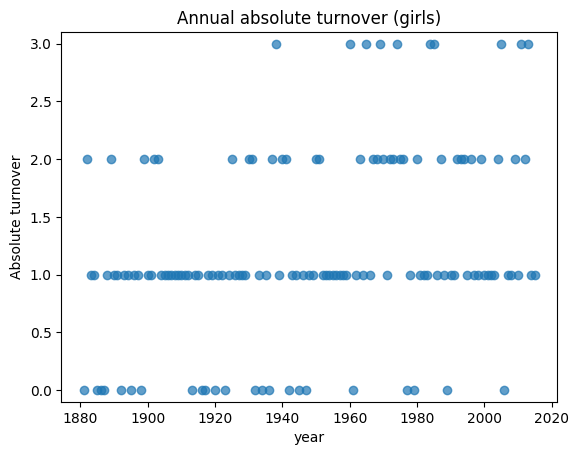

In [57]:
ax = girl_turnover.plot(
    style='o', ylim=(-0.1, 3.1), alpha=0.7,
    title='Annual absolute turnover (girls)'
)
ax.set_ylabel("Absolute turnover");

<!-- Figure: Visualization of the absolute turnover for girl names in the United States of America.\label{fig:working-with-data:absolute-girl-turnover} -->

Pandas's two central data types (`Series` and `DataFrame`) feature the method `plot()`, which enables us to efficiently and conveniently produce high-quality visualizations of our data. In the example above, calling the method `plot()` on the `Series` object `girl_turnover` produces a simple visualization of the absolute turnover per year. Note that Pandas automatically adds a label to the X-axis, which corresponds to the name of the index of `girl_turnover`. In the method call, we specify three arguments. First, by specifying `style='o'` we tell Pandas to produce a plot with dots. Second, the argument `ylim=(-0.1, 3.1)` sets the Y-limits of the plot. Finally, we assign a title to the plot with `title="Annual absolute turnover (girls)"`.

The default plot type produced by `plot()` is of kind "line". Other kinds include "bar plots", "histograms", "pie charts", and so on and so forth. To create a <span class="index">histogram</span> of the annual turnovers, we could write something like the following:

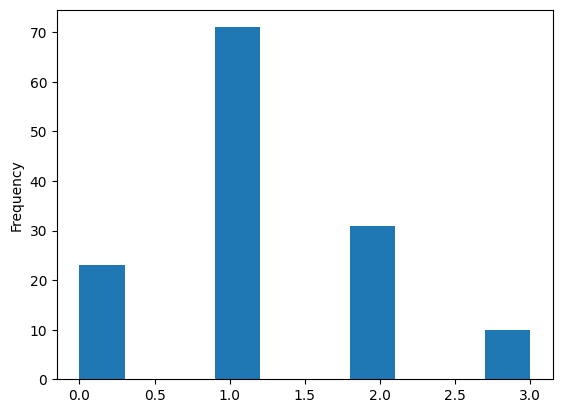

In [58]:
girl_turnover.plot(kind='hist');

<!-- Figure: Histogram of the turnover for girl names in the United States of America.\label{fig:working-with-data:girl-names-histogram} -->

Although we can discern a tendency towards a higher turnover rate in modern times, the annual turnover visualization does not provide us with an easily interpretable picture. In order to make such visual intuitions more clear and to test their validity, we can employ a smoothing function, which attempts to capture important patterns in our data, while leaving out noise. A relatively simple <span class="index">smoothing</span> function is called "<span class="index">moving average</span>" or "<span class="index">rolling mean</span>". Simply put, this smoothing function computes the average of the previous $w$ data points for each data point in the collection. For example, if $w=5$ and the current data point is from the year 2000, we take the average turnover of the previous five years. Pandas implements a variety of "rolling" functions through the method <span class="index">`Series.rolling()`</span>. This method's argument `window` allows the user to specify the window size, i.e. the previous $w$ data points. By subsequently calling the method `Series.mean()` on top of the results yielded by `Series.rolling()`, we obtain a rolling average of our data. Consider the following code block, in which we set the window size to 25:

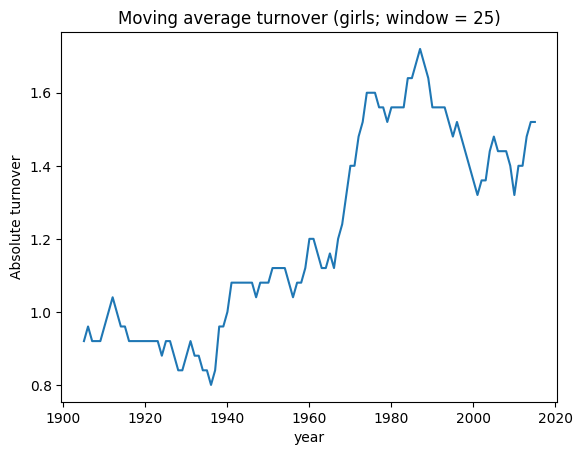

In [59]:
girl_rm = girl_turnover.rolling(25).mean()
ax = girl_rm.plot(title="Moving average turnover (girls; window = 25)")
ax.set_ylabel("Absolute turnover");

<!-- Figure: Visualization of the moving average turnover (window is 25 years) for girl names.\label{fig:working-with-data:moving-turnover-girls} -->

The resulting visualization confirms our intuition, as we can observe a clear increase of the turnover in modern times. Is there a similar accelerating rate of change in the names given to boys?

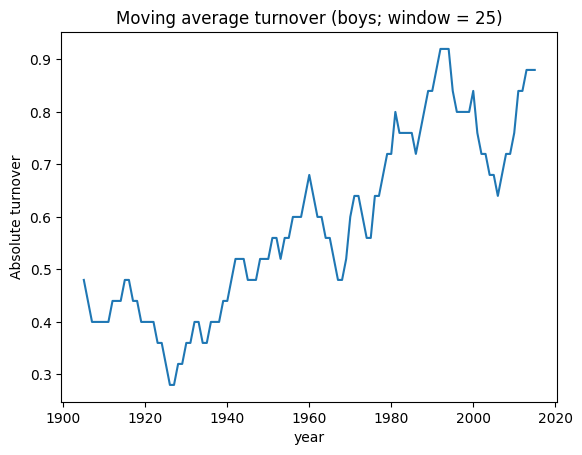

In [60]:
boy_rm = boy_turnover.rolling(25).mean()
ax = boy_rm.plot(title="Moving average turnover (boys; window = 25)")
ax.set_ylabel("Absolute turnover");

<!-- Figure: Visualization of the moving average turnover (window is 25 years) for boy names.\label{fig:working-with-data:moving-turnover-boys} -->

The rolling average visualization of boy turnovers suggests that there is a similar acceleration. Our analysis thus seems to provide additional evidence for {cite:t}`lieberson:2000`'s claim that the rate of change in the leading names given to children has increased over the past two centuries. In what follows, we will have a closer look at how the practice of naming children in the United States has changed over the course of the past two centuries.

(sec-working-with-data-case-studies)=
## Changing Naming Practices

In the previous section, we identified a rapid acceleration of the rate of change in the leading names given to children in the United States. In this section, we shed light on some specific changes the naming practice has undergone, and also on some intriguing patterns of change. We will work our way through three small case studies, and demonstrate some of the more advanced functionality of the Pandas library along the way.

(sec-working-with-data-name-diversity)=
### Increasing name diversity

A development related to the rate acceleration in name changes is <span class="index">name
diversification</span>. It has been observed by various scholars that over the course of
the past two centuries more and more names came into use, while at the same time, the most
popular names were given to less and less children {cite:p}`lieberson:2000`. In this
section, we attempt to back up these two claims with some empirical evidence.

The first claim can be addressed by investigating the <span class="index">type-token ratio</span> of names as it progresses through time. The annual type-token ratio is computed by dividing the number of unique names occurring in a particular year (i.e., the type frequency) by the sum of their frequencies (i.e., the token frequency). For each year, our data set provides the frequency of occurrence of all unique names occurring at least five times in that year. Computing the type-token ratio, then, can be accomplished by dividing the number of rows by the sum of the names' frequencies. The following function implements this computation:

In [61]:
def type_token_ratio(frequencies):
    """Compute the type-token ratio of the frequencies."""
    return len(frequencies) / frequencies.sum()

The next step is to apply the function `type_token_ratio()` to the annual name records for both sexes. Executing the following code block yields the visualization of the type-token ratio for girl names over time.

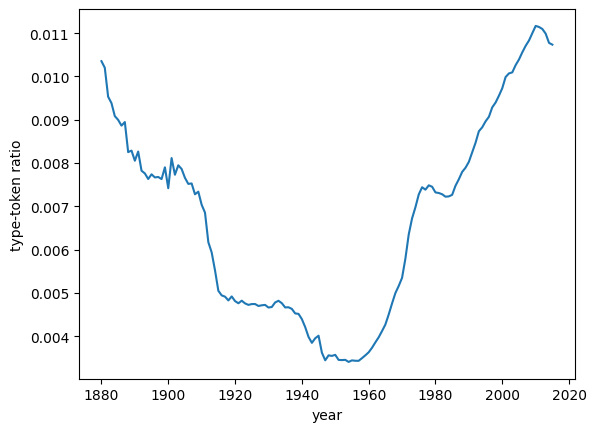

In [62]:
ax = df.loc[df['sex'] == 'F'].groupby(level=0)['frequency'].apply(type_token_ratio).plot();
ax.set_ylabel("type-token ratio");

<!-- Figure: Visualization of the type-token ratio for girl names over time in the United States of America.\label{fig:working-with-data:type-token-ratio-girls} -->

Let's break up this long and complex line. First, using `df.loc[df['sex'] == 'F']`, we
select all rows with names given to women. Second, we split the yielded data set into
annual groups using `groupby(level=0)` (recall that the first level of the index, level 0,
corresponds to the years of the rows). Subsequently, we apply the function `type_token_ratio()` to each of these annual sub-datasets. Finally, we call the method `plot()` to create a line graph of the computed type-token ratios. Using a simple `for` loop, then, we can create a similar visualization with the type-token ratios for both girls and boys:

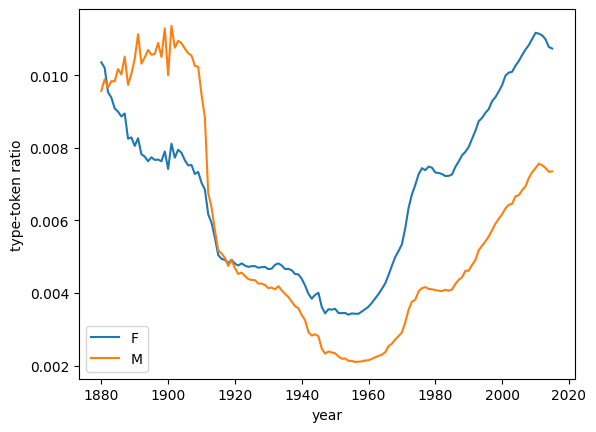

In [63]:
import matplotlib.pyplot as plt

# create an empty plot
fig, ax = plt.subplots()

for sex in ['F', 'M']:
    counts = df.loc[df['sex'] == sex, 'frequency']
    tt_ratios = counts.groupby(level=0).apply(type_token_ratio)
    # Use the same axis to plot both sexes (i.e. ax=ax)
    tt_ratios.plot(label=sex, legend=True, ax=ax)
ax.set_ylabel("type-token ratio");

<!-- Figure: Visualization of the type-token ratio for girl and boy names over time in the United States of America.\label{fig:working-with-data:type-token-ratio-girls-boys} -->

At first glance, the visualization above seems to run counter to the hypothesis of name diversification. After all, the type-ratio remains relatively high until the early 1900s, and it is approximately equal to modern times. Were people as creative name givers in the beginning of the twentieth century as they are today? No, they were not. To understand the relatively high ratio in the beginning of the twentieth century, it should be taken into account that the dataset misses many records from before 1935, when the Social Security Number system was introduced in the United States. Thus, the peaks in type-token ratio at the beginning of the twentieth century essentially represent an artifact of the data. After 1935, the data are more complete and more reliable. Starting in the 1960s, we can observe a steady increase of the type-token ratio, which is more in line with the hypothesis of increasing diversity.

Let us now turn to the second diversity related development: can we observe a decline in the frequency of use of the most popular names? Addressing this question requires us to compute the relative frequency of each name per year, and, subsequently, to take the highest relative frequency from a particular year. Consider the following code block and its corresponding visualization below:

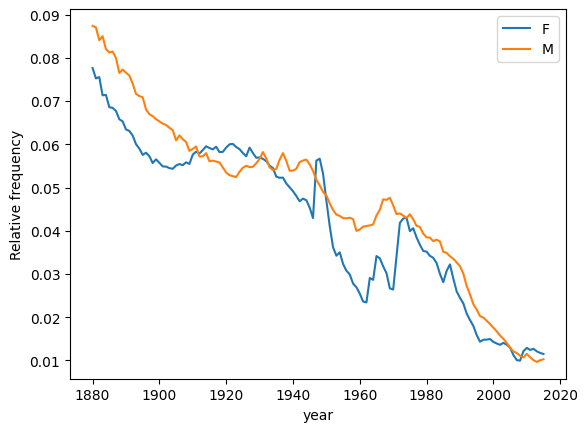

In [64]:
def max_relative_frequency(frequencies):
    return (frequencies / frequencies.sum()).max()

# create an empty plot
fig, ax = plt.subplots()

for sex in ['F', 'M']:
    counts = df.loc[df['sex'] == sex, 'frequency']
    div = counts.groupby(level=0).apply(max_relative_frequency)
    div.plot(label=sex, legend=True, ax=ax)
ax.set_ylabel("Relative frequency");

<!-- Figure: Visualization of the highest relative name frequency per year. The results show a clear decline in the usage frequency of the most popular names over time.\label{fig:working-with-data:relative-name-frequencies} -->

As before, we construct annual data sets for both sexes. The maximum relative frequency is computed by first calculating relative frequencies (`frequencies / frequencies.sum()`), and, subsequently, finding the maximum in the resulting vector of proportions via the method `Series.max()`. The results unequivocally indicate a decline in the relative frequency of the most popular names, which serves as additional evidence to the diversity hypothesis.

(sec-working-with-data-name-ending-bias)
### A bias for names ending in *n*?

It has been noted at various occasions that one of the most striking changes in the practice of name giving is the explosive rise in the popularity of boy names ending with the letter *n*. In this section, we will demonstrate how to employ Python and the Pandas library to visualize this development. Before we discuss the more technical details, let us first pause for a moment and try to come up with a more abstract problem description.

Essentially, we aim to construct annual frequency distributions of name-final letters. Take the following set of names as an example: *John*, *William*, *James*, *Charles*, *Joseph*, *Thomas*, *Henry*, *Nathan*. To compute a frequency distribution over the final letters for this set of names, we count how often each unique final letter occurs in the set. Thus, the letter *n*, for example, occurs twice, and the letter *y* occurs once. Computing a frequency distribution for all years in the collections, then, allows us to investigate any possible trends in these distributions.

Computing these frequency distributions involves the following two steps. The first step is to extract the final letter of each name in the dataset. Subsequently, we compute a frequency distribution over these letters per year. Before addressing the first problem, we first create a new `Series` object representing all boy names in the dataset:

In [65]:
boys_names = df.loc[df['sex'] == 'M', 'name']
boys_names.head()

year
1880       John
1880    William
1880      James
1880    Charles
1880     George
Name: name, dtype: object

The next step is to extract the final character of each name in this `Series` object. In order to do so, we could resort to a simple `for` loop, in which we extract all final letters and ultimately construct a new `Series` object. It must be stressed, however, that iterating over `DataFrame` or `Series` objects with Python `for` loops is rather inefficient and slow. When working with Pandas objects (and NumPy objects alike), a more efficient and faster solution almost always exists. In fact, whenever tempted to employ a `for` loop on a `DataFrame`, `Series`, or NumPy's `ndarray`, one should attempt to reformulate the problem at hand in terms of "<span class="index">vectorized operation</span>s". Pandas provides a variety of 'vectorized string functions' for `Series` and `Index` objects, including, but not limited to, a capitalization function (<span class="index">`Series.str.capitalize()`</span>), a function for finding substrings (<span class="index">`Series.str.find()`</span>), and a function for splitting strings (<span class="index">`Series.str.split()`</span>). To lowercase all names in `boys_names` we write the following:

In [66]:
boys_names.str.lower().head()

year
1880       john
1880    william
1880      james
1880    charles
1880     george
Name: name, dtype: object

Similarly, to extract all names containing an *o* as first vowel, we could use a regular
expression and write something like:

In [67]:
boys_names.loc[boys_names.str.match('[^aeiou]+o[^aeiou]', case=False)].head()

year
1880      John
1880    Joseph
1880    Thomas
1880    Robert
1880       Roy
Name: name, dtype: object

The function `Series.str.get(i)` extracts the element at position `i` for each element in a `Series` or `Index` object. To extract the first letter of each name, for example, we write:

In [68]:
boys_names.str.get(0).head()

year
1880    J
1880    W
1880    J
1880    C
1880    G
Name: name, dtype: object

Similarly, retrieving the final letter of each name involves calling the function with `-1` as argument:

In [69]:
boys_coda = boys_names.str.get(-1)
boys_coda.head()

year
1880    n
1880    m
1880    s
1880    s
1880    e
Name: name, dtype: object

Now that we have extracted the final letter of each name in our dataset, we can move on to the next task, which is to compute a frequency distribution over these letters per year. Similar to before, we can split the data into annual groups by employing the <span class="index">`Series.groupby()`</span> method on the index of `boys_coda`. Subsequently, the method <span class="index">`Series.value_counts()`</span> is called for each of these annual subsets, yielding frequency distributions over their values. By supplying the argument `normalize=True`, the computed frequencies are normalized within the range of 0 to 1. Consider the following code block:

In [70]:
boys_fd = boys_coda.groupby('year').value_counts(normalize=True)
boys_fd.head()

year  name
1880  n       0.181646
      e       0.156102
      s       0.098392
      y       0.095553
      d       0.080416
Name: name, dtype: float64

This final step completes the computation of the annual frequency distributions over the name-final letters. The label-location based indexer <span class="index">`Series.loc`</span> enables us to conveniently select and extract data from these distributions. To select the frequency distribution for the year 1940, for example, we write the following:

In [71]:
boys_fd.loc[1940].sort_index().head()

name
a    0.029232
b    0.002288
c    0.004575
d    0.074479
e    0.164718
Name: name, dtype: float64

Similarly, to select the relative frequency of the letters *n*, *p*, and *r* in 1960, we write:

In [72]:
boys_fd.loc[[(1960, 'n'), (1960, 'p'), (1960, 'r')]]

year  name
1960  n       0.190891
      p       0.003705
      r       0.046851
Name: name, dtype: float64

While convenient for selecting data, being a `Series` object with more than one index (represented in Pandas as a <span class="index">`MultiIndex`</span>) is less convenient for doing time series analyses for each of the letters. A better representation would be a `DataFrame` object with columns identifying unique name-final letters and the index representing the years corresponding to each row. To "reshape" the `Series` into this form, we can employ the <span class="index">`Series.unstack()`</span> method:

In [73]:
boys_fd = boys_fd.unstack()
boys_fd.head()

name,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,0.029328,0.006623,0.006623,0.080416,0.156102,0.006623,0.007569,0.032167,0.003784,NaN,...,NaN,0.068117,0.098392,0.060549,0.002838,0.000946,0.006623,0.003784,0.095553,0.002838
1881,0.027108,0.006024,0.008032,0.076305,0.148594,0.005020,0.012048,0.033133,0.003012,NaN,...,NaN,0.072289,0.098394,0.068273,0.002008,0.001004,0.006024,0.005020,0.095382,0.001004
1882,0.025501,0.006375,0.006375,0.080146,0.166667,0.007286,0.008197,0.033698,0.002732,NaN,...,NaN,0.067395,0.093807,0.062842,0.000911,0.000911,0.007286,0.004554,0.100182,0.002732
1883,0.028183,0.004859,0.006803,0.082604,0.158406,0.006803,0.008746,0.030126,0.001944,NaN,...,NaN,0.066084,0.099125,0.062196,0.001944,0.000972,0.008746,0.004859,0.094266,0.000972
1884,0.028444,0.008889,0.006222,0.080000,0.155556,0.005333,0.007111,0.031111,0.001778,NaN,...,NaN,0.073778,0.097778,0.061333,0.001778,0.000889,0.006222,0.003556,0.100444,0.002667


As can be observed, <span class="index">`Series.unstack()`</span> <span class="index">unstack</span>s or <span class="index">pivot</span>s the name level of the index of `boys_fd` to a column axis. The method thus produces a new `DataFrame` object with the innermost level of the index (i.e., the name-final letters) as column labels and the outermost level (i.e., the years) as row indexes. Note that the new `DataFrame` object contains <span class="index">NaN</span> values, which indicate missing data. These NaN values are the result of transposing the `Series` to a `DataFrame` object. The `Series` representation only stores the frequencies of name-final letters observed in a particular year. However, since a `DataFrame` is essentially a matrix, it is required to specify the contents of each cell, and thus, to fill each combination of year and name-final letter. Pandas uses the default value <span class="index">NaN</span> to fill missing cells. Essentially, the NaN values in our data frame represent name-final letters that do not occur in a particular year. Therefore, it makes more sense to represent these values as zeros. Converting NaN values to a different representation can be accomplished with the <span class="index">`DataFrame.fillna()`</span> method. In the following code block, we fill the NaN values with zeros:

In [74]:
boys_fd = boys_fd.fillna(0)

The goal of converting our `Series` object into a `DataFrame` was to more conveniently plot time series of the individual letters. Executing the following code block yields a time series plot for eight interesting letters (i.e., columns) in `boys_fd` (we leave it as an exercise to the reader to plot the remaining letters):

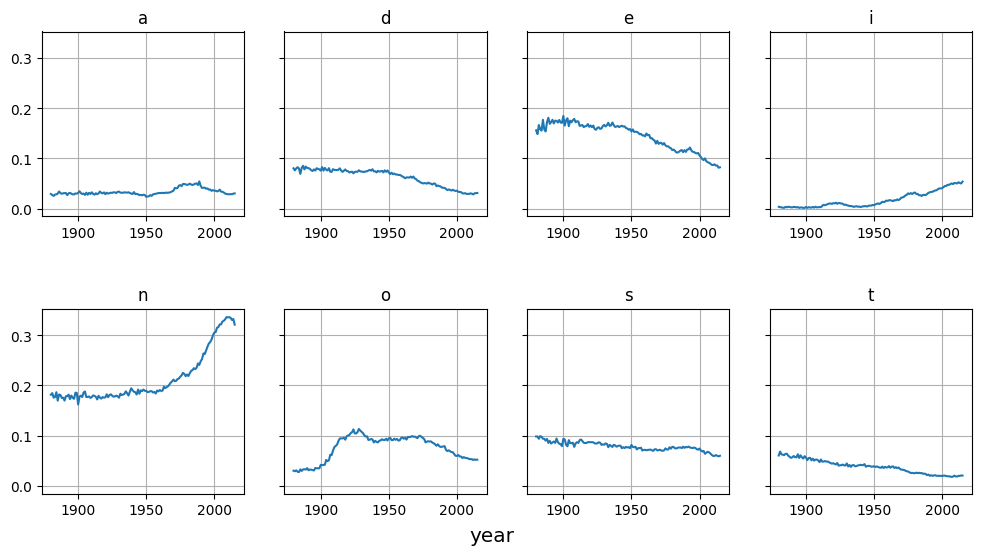

In [75]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    nrows=2, ncols=4, sharey=True, figsize=(12, 6))

letters = ["a", "d", "e", "i", "n", "o", "s", "t"]
axes = boys_fd[letters].plot(
    subplots=True, ax=axes, title=letters, color='C0', grid=True, legend=False)

# The X-axis of each subplot is labeled with 'year'.
# We remove those and add one main X-axis label
for ax in axes.flatten():
    ax.xaxis.label.set_visible(False)
fig.text(0.5, 0.04, "year", ha="center", va="center", fontsize="x-large")
# Reserve some additional height for space between subplots
fig.subplots_adjust(hspace=0.5);

<!-- Figure: Visualization of boy name-final letter frequencies over time.\label{fig:working-with-data:name-final-letter-frequencies} -->

Before interpreting these plots, let us first explain some of the parameters used to
create the figure. Using <span class="index">`pyplot.subplots()`</span>, we create a figure and a set of subplots. The subplots are spread over two rows (`nrows=2`) and four columns (`ncols=4`). The parameter `sharey=True` indicates that all subplots should share the Y-axis (i.e., have the same limits) and sets some Y-axis labels to invisible. The subplots are populated by calling the `plot()` method of `boys_fd`. To do so, the parameter `subplots` need to be set to `True`, to ensure that each variable (i.e. column) is visualized in a separate plot. By specifying the `ax` parameter, we tell Pandas to draw the different graphs in the constructed subplots (i.e., `ax=axes`). Finally, each subplot obtains its own title, when a list of titles is provided as argument to the `title` parameter. The remaining lines of code help to clean up the graph.

Several observations can be made from the figure above. First and foremost, the time series visualization of the usage frequency of the name-final letter *n* confirms the suggested explosive rise in the popularity of boys' names ending with the letter *n*. Over the years, the numbers gradually increase before they suddenly take off in the 1990s and 2000s. A second observation to be made is the steady decrease of the name-final letter *e* as well as the letter *d*. Finally, we note a relatively sudden disposition for the letter *i* in the late 1990s.

(sec-working-with-data-unisex-names)=
### Unisex names in the United States

In this last section, we will map out the top <span class="index">unisex names</span> in the dataset (for a
discussion of the evolution of unisex names, see {cite:t}`barry:1982`). Some names, such as Frank or Mike, are and have been predominantly given to boys, while others are given to both men and women. The goal of this section is to create a visualization of the top *n* unisex names, which depicts how the usage ratio between boys and girls changes over time for each of these names. Creating this visualization requires some relatively advanced use of the Pandas library. But before we delve into the technical details, let us first settle down on what is meant by "the *n* most unisex names". Arguably, the unisex degree of a name can be defined in terms of its usage ratio between boys and girls. A name with a 50-50 split appears to be more unisex than a name with a 5-95 split. Furthermore, names that retain a 50-50 split over the years are more ambiguous as to whether they refer to boys or girls than names with strong fluctuations in their usage ratio.

The first step is to determine which names alternate between boys and girls at all. The method <span class="index">`DataFrame.duplicated()`</span> can be employed to filter duplicate rows of a `DataFrame` object. By default, the method searches for exact row duplicates, i.e., two rows are considered to be duplicates if they have all values in common. By supplying a value to the argument `subset`, we instruct the method to only consider one or a subset of columns for identifying duplicate rows. As such, by supplying the value `'name'` to `subset`, we can retrieve the rows that occur multiple times in a particular year. Since names are only listed twice if they occur with both sexes, this method provides us with a list of all unisex names in a particular year. Consider the following lines of code:

In [76]:
d = df.loc[1910]
duplicates = d[d.duplicated(subset='name')]['name']
duplicates.head()

year
1910       John
1910      James
1910    William
1910     Robert
1910     George
Name: name, dtype: object

Having a way to filter unisex names, we can move on to the next step, which is to compute the usage ratio of the retrieved unisex names between boys and girls. To compute this ratio, we need to retrieve the frequency of use for each name with both sexes. By default, <span class="index">`DataFrame.duplicated()`</span> marks all duplicates as `True` except for the first occurrence. This is expected behavior if we want to construct a list of duplicate items. For our purposes, however, we require *all* duplicates, because we need the usage frequency of both sexes to compute the usage ratio. Fortunately, the method `DataFrame.duplicated()` provides the argument `keep`, which, when set to `False`, ensures that all duplicates are marked `True`:

In [77]:
d = d.loc[d.duplicated(subset='name', keep=False)]
d.sort_values('name').head()

,name,sex,frequency
year,,,
1910,Abbie,M,8
1910,Abbie,F,79
1910,Addie,M,8
1910,Addie,F,495
1910,Adell,M,6


We now have all the necessary data to compute the usage ratio of each unisex name. However, it is not straightforward to compute this number given the way the table is currently structured. This problem can be resolved by pivoting the table using the previously discussed <span class="index">`DataFrame.pivot_table()`</span> method:

In [78]:
d = d.pivot_table(values='frequency', index='name', columns='sex')
d.head()

sex,F,M
name,,
Abbie,79,8
Addie,495,8
Adell,86,6
Afton,14,6
Agnes,2163,13


Computing the final usage ratios, then, is conveniently done using vectorized operations:

In [79]:
(d['F'] / (d['F'] + d['M'])).head()

name
Abbie    0.908046
Addie    0.984095
Adell    0.934783
Afton    0.700000
Agnes    0.994026
dtype: float64

We need to repeat this procedure to compute the unisex usage ratios for each year in the collection. This can be achieved by wrapping the necessary steps into a function, and, subsequently, employ the "groupby-then-apply" combination. Consider the following code block:

In [80]:
def usage_ratio(df):
    """Compute the usage ratio for unisex names."""
    df = df.loc[df.duplicated(subset='name', keep=False)]
    df = df.pivot_table(values='frequency', index='name', columns='sex')
    return df['F'] / (df['F'] + df['M'])

In [81]:
d = df.groupby(level=0).apply(usage_ratio)
d.head()

year  name 
1880  Addie    0.971631
      Allie    0.772059
      Alma     0.951890
      Alpha    0.812500
      Alva     0.195402
dtype: float64

We can now move on to creating a visualization of the unisex ratios over time. The goal is to create a simple line graph for each name, which reflects the usage ratio between boys and girls throughout the twentieth century. Like before, creating this visualization will be much easier if we convert the current `Series` object into a `DataFrame` with columns identifying all names, and the index representing the years. The <span class="index">`Series.unstack()`</span> method can be used to reshape the series into the desired format:

In [82]:
d = d.unstack(level='name')
d.tail()

name,Aaden,Aadi,Aadyn,Aalijah,Aaliyah,Aamari,Aamir,Aaren,Aarian,Aarin,...,Zuriel,Zyah,Zyair,Zyaire,Zyan,Zyian,Zyien,Zyion,Zyon,Zyree
year,,,,,,,,,,,,,,,,,,,,,
2011,NaN,NaN,NaN,0.318182,NaN,0.428571,NaN,NaN,NaN,NaN,...,0.131579,NaN,0.187500,0.154206,0.220779,0.571429,NaN,0.153153,0.155080,NaN
2012,NaN,0.081967,NaN,0.333333,0.998729,NaN,NaN,NaN,0.333333,0.187500,...,0.244186,NaN,0.131148,0.177083,0.161290,0.470588,NaN,0.144737,0.257426,NaN
2013,NaN,0.078947,NaN,0.500000,0.997705,0.333333,0.042553,NaN,0.208333,NaN,...,0.220930,NaN,0.138889,0.168269,0.260274,NaN,NaN,0.225352,0.147239,0.5
2014,NaN,NaN,NaN,0.363636,0.998975,0.400000,NaN,NaN,0.350000,0.166667,...,0.313869,NaN,0.108108,0.123711,0.268657,NaN,NaN,0.197802,0.209790,NaN
2015,NaN,NaN,NaN,0.413793,0.998967,0.562500,NaN,NaN,0.380952,NaN,...,0.246575,0.75,0.098592,0.107981,0.156250,NaN,NaN,0.094595,0.164773,NaN


There are 9,025 unisex names in the collection, but not all of them are ambiguous with respect to sex to the same degree. As stated before, names with usage ratios that stick around a 50-50 split between boys and girls appear to be the most unisex names. Ideally, we construct a ranking of the unisex names, which represents how close each name is to this 50-50 split. Such a ranking can be constructed by taking the following steps. First, we take the mean of the absolute differences between each name's usage ratio for each year and 0.5. Second, we sort the yielded mean differences in ascending order. Finally, taking the index of this sorted list provides us with a ranking of names according to how unisex they are over time. The following code block implements this computation:

In [83]:
unisex_ranking = abs(d - 0.5).fillna(0.5).mean().sort_values().index

Note that after computing the absolute differences, remaining <span class="index">NaN</span> values are filled with the value 0.5. These NaN values represent missing data that are penalized with the maximum absolute difference, i.e., 0.5. All that remains is to create our visualization. Given the way we have structured the data frame `d`, this can be accomplished by first indexing for the *n* most unisex names, and subsequently calling <span class="index">`DataFrame.plot()`</span>:

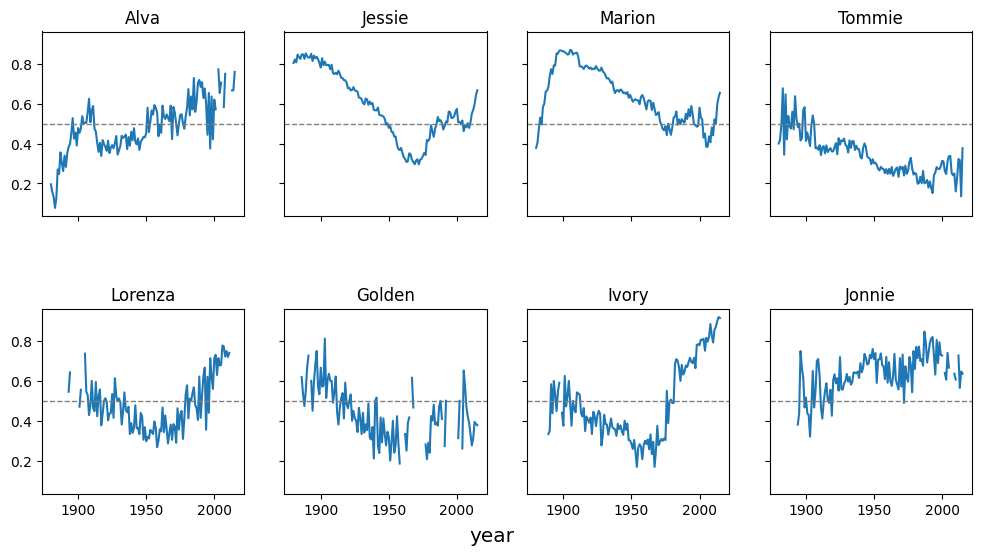

In [84]:
# Create a figure and subplots
fig, axes = plt.subplots(
    nrows=2, ncols=4, sharey=True, sharex=True, figsize=(12, 6))

# Plot the time series into the subplots
names = unisex_ranking[:8].tolist()
d[names].plot(
    subplots=True, color="C0", ax=axes, legend=False, title=names)

# Clean up some redundant labels and adjust spacing
for ax in axes.flatten():
    ax.xaxis.label.set_visible(False)
    ax.axhline(0.5, ls='--', color="grey", lw=1)
fig.text(0.5, 0.04, "year", ha="center", va="center", fontsize="x-large");
fig.subplots_adjust(hspace=0.5);

<!-- Figure: Visualization of the eight most unisex names in the data, showing the usage ratio between boys and girls throughout the twentieth century.\label{fig:working-with-data:unisex-names} -->

It is interesting to observe that the four most unisex names in the United States appear to be Alva, Jessie, Marion, and Tommie. As we go further down the list, the ratio curves become increasingly noisy, with curves going up and down. We can smooth these lines a bit by computing rolling averages over the ratios. Have a look at the following code block and its visualization below:

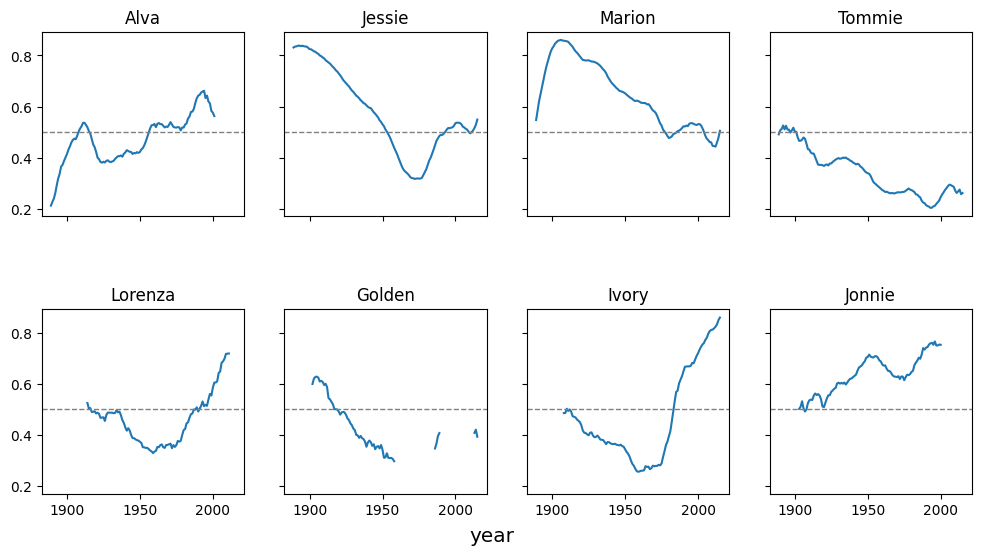

In [85]:
# Create a figure and subplots
fig, axes = plt.subplots(
    nrows=2, ncols=4, sharey=True, sharex=True, figsize=(12, 6))

# Plot the time series into the subplots
d[names].rolling(window=10).mean().plot(
    color='C0', subplots=True, ax=axes, legend=False, title=names);

# Clean up some redundant labels and adjust spacing
for ax in axes.flatten():
    ax.xaxis.label.set_visible(False)
    ax.axhline(0.5, ls='--', color="grey", lw=1)
fig.text(0.5, 0.04, "year", ha="center", va="center", fontsize="x-large");
fig.subplots_adjust(hspace=0.5);

<!-- Figure: Visualization of the *n* most unisex names in the data, showing the usage ratio between boys and girls throughout the twentieth century. This visualization employs a rolling average to smooth-out some of the noise in the curves.\label{fig:working-with-data:unisex-names-smoothed} -->

(sec-working-with-data-further-reading)=
## Conclusions and Further Reading

In what precedes, we have introduced the Pandas library for doing data analysis with
Python. On the basis of a case study on naming practices in the United States of America,
we have shown how Pandas can be put to use to manipulate and analyze tabular
data. Additionally, it was demonstrated how the time series and plotting functionality of
the Pandas library can be employed to effectively analyze, visualize, and report long-term
diachronic shifts in historical data. Efficiently manipulating and analyzing tabular data
is a skill required in many quantitative data analyses, and this skill will be called on
extensively in the remaining chapters. Needless to say, this chapter's introduction to the
library only scratches the surface of what Pandas can do. For a more thorough
introduction, we refer the reader to the books *Python for Data Analysis* {cite:p}`mckinney:2012`
and *Python Data Science Handbook* {cite:p}`vanderplas:2016`. These texts describe in greater
detail the underlying data types used by Pandas and offer more examples of common
calculations involving tabular datasets.